In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Worklab/MF_Model/Modules')

import mf_if_models as mf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [3]:
vec_nu_i = np.array([0.005, 0.01, 0.02])
vec_nu_label = ["5", "10", "20"]
vec_tau_E = np.linspace(0.1, 100, 100)

df_nu = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
					vec_nu_i[1]:np.zeros_like(vec_tau_E),
					vec_nu_i[2]:np.zeros_like(vec_tau_E)})

In [4]:
n = 30000

for nu_i in vec_nu_i:
    print(nu_i, end='\t')
    for i, tau_E in enumerate(vec_tau_E):
        print(i, end=' ')
        model = mf.MCoBaIF(w_E = 0.1,
						w_I = 0.4,
						tau_E = tau_E,
						tau_I = 10,
						nu_i = nu_i)
        E_I = model.E_I
        V_th = model.V_th

        vec_Vk = np.linspace(E_I, V_th, n + 1)

        df_nu[nu_i][i] = model.calculate_firing_rate(vec_Vk)
    
    print()

0.005	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.01	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.02	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [5]:
fRate_data_path = "../../Data/fRate_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_iRate.dat", index_col=0)


In [6]:
index = list(range(0, 200, 3))
df_nu_sim = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
					vec_nu_i[1]:np.zeros_like(vec_tau_E),
					vec_nu_i[2]:np.zeros_like(vec_tau_E)})

for nu_i, nu_label in zip(vec_nu_i, vec_nu_label):
	for i in range(len(vec_tau_E)):
		df_nu_sim[nu_i][i] = df_nu_sim_read[nu_label][3*i]



In [7]:
df_error = pd.DataFrame({vec_nu_i[0]:np.zeros_like(vec_tau_E),
						vec_nu_i[1]:np.zeros_like(vec_tau_E),
						vec_nu_i[2]:np.zeros_like(vec_tau_E)})

for nu_i in vec_nu_i:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[nu_i], df_nu[nu_i])):
		df_error[nu_i][i] = np.abs(nu_sim - nu_analyt * 1000)


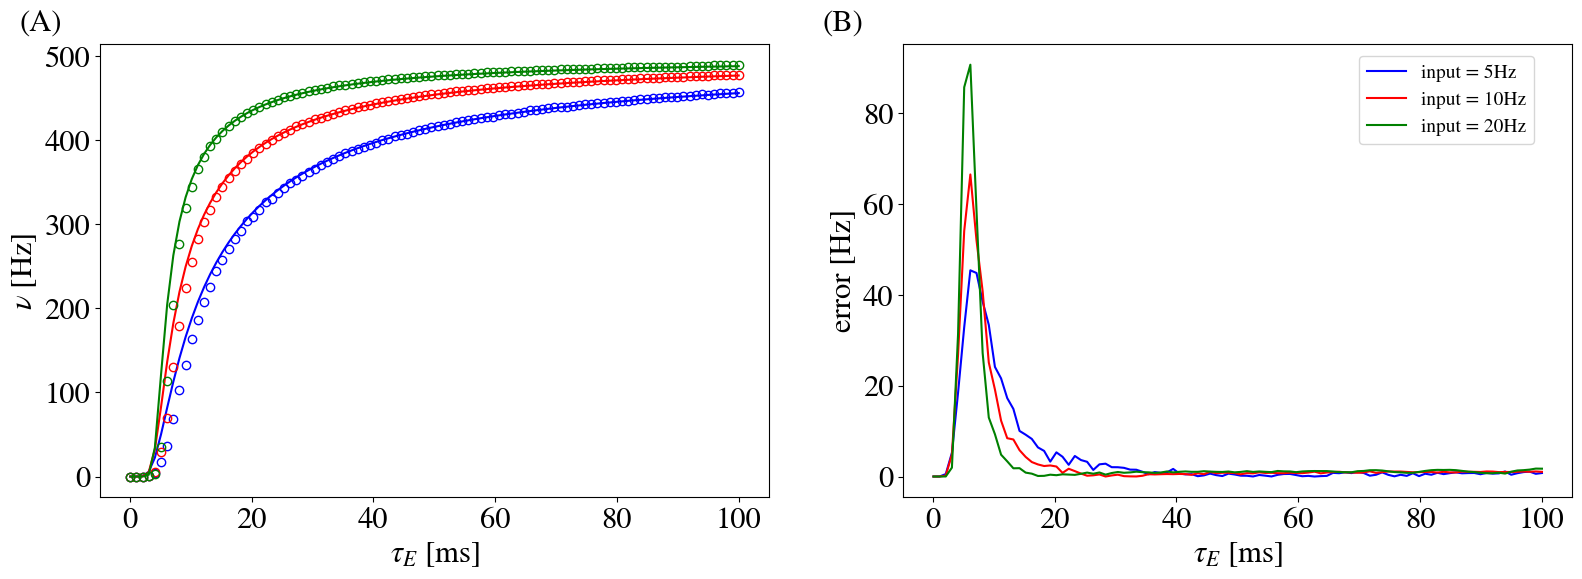

In [8]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\tau_E$ [ms]')
axs[0][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_tau_E, df_nu[vec_nu_i[0]]*1000, 'b-', label='input = 5Hz')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_nu_i[1]]*1000, 'r-', label='input = 10Hz')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_nu_i[2]]*1000, 'g-', label='input = 20Hz')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_nu_i[2]], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_error[vec_nu_i[0]], 'b-')
axs[0][1].plot(vec_tau_E, df_error[vec_nu_i[1]], 'r-')
axs[0][1].plot(vec_tau_E, df_error[vec_nu_i[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})